In [3]:
# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure the backend is set appropriately if only plt is imported

# Enable inline plotting
%matplotlib inline

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Set Seaborn style
sns.set(style="whitegrid")

In [4]:
# Load the datasets
# We have two data files; here we load both. The second dataset appears to be the clean version.
file1 = '../data/track_data_final.csv'
file2 = '../data/spotify_data_clean.csv'


df_original = pd.read_csv(file1, encoding='utf-8')
df_clean = pd.read_csv(file2, encoding='utf-8')

# Let's inspect the shapes to get a sense of the data
print('Original Data Shape:', df_original.shape)
print('Clean Data Shape:', df_clean.shape)

Original Data Shape: (8778, 15)
Clean Data Shape: (8582, 15)


In [6]:
## Data Exploration

# Explore the first few rows of the clean dataset
print('Head of the clean data:')
display(df_clean.head())

# Get dataset information and summary statistics
print('Data Information:')
display(df_clean.info())

print('Summary statistics:')
display(df_clean.describe(include='all'))

Head of the clean data:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), obj

None

Summary statistics:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
count,8582,8582,8582.000000,8582.000000,8582,8579,8582.000000,8.582000e+03,5221,8582,8582,8582,8582.000000,8582,8582.000000
unique,8582,7462,NaN,NaN,2,2547,NaN,NaN,661,5205,4870,2384,NaN,3,NaN
top,3EJS5LyekDim1Tf5rBFmZl,Flowers,NaN,NaN,False,Taylor Swift,NaN,NaN,soundtrack,3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),2010-01-01,NaN,album,NaN
freq,1,8,NaN,NaN,6434,324,NaN,NaN,345,70,70,76,NaN,5856,NaN
mean,NaN,NaN,5.772547,52.356211,NaN,NaN,69.730016,2.403472e+07,NaN,NaN,NaN,NaN,13.789443,NaN,3.492805
std,NaN,NaN,6.052792,23.816076,NaN,NaN,19.645979,3.803180e+07,NaN,NaN,NaN,NaN,11.887131,NaN,1.057970
min,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,0.070000
25%,NaN,NaN,1.000000,39.000000,NaN,NaN,60.000000,4.623200e+05,NaN,NaN,NaN,NaN,6.000000,NaN,2.880000
50%,NaN,NaN,4.000000,58.000000,NaN,NaN,74.000000,6.105547e+06,NaN,NaN,NaN,NaN,13.000000,NaN,3.445000
75%,NaN,NaN,9.000000,71.000000,NaN,NaN,84.000000,2.725255e+07,NaN,NaN,NaN,NaN,17.000000,NaN,3.990000


In [7]:
## Data Cleaning and Preprocessing

# Convert album_release_date to datetime format
# Although the column is specified as a string, inferring the date type can be useful
for df in [df_original, df_clean]:
    if 'album_release_date' in df.columns:
        # Using errors='coerce' to avoid issues with unexpected date formats
        df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# Check for missing values in the clean dataframe
missing_vals = df_clean.isnull().sum()
print('Missing values in each column:')
print(missing_vals)

# Additional cleaning steps can be added here as necessary

# For numeric correlation analyses later, we extract only numeric columns from the clean data
numeric_df = df_clean.select_dtypes(include=[np.number])

Missing values in each column:
track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64


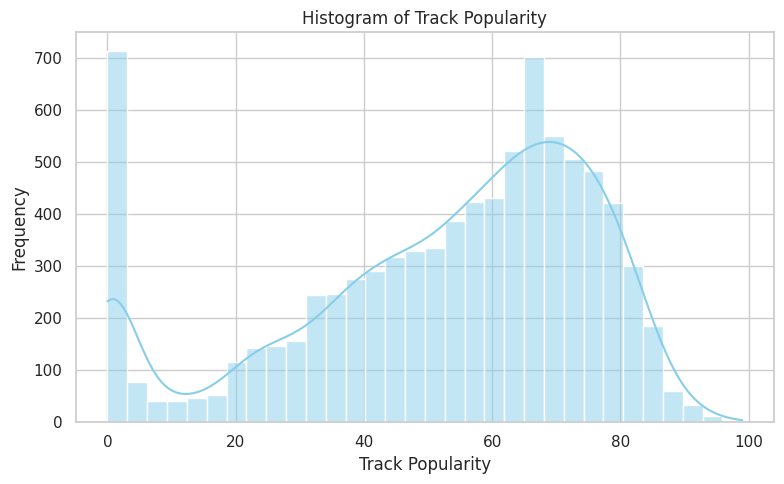

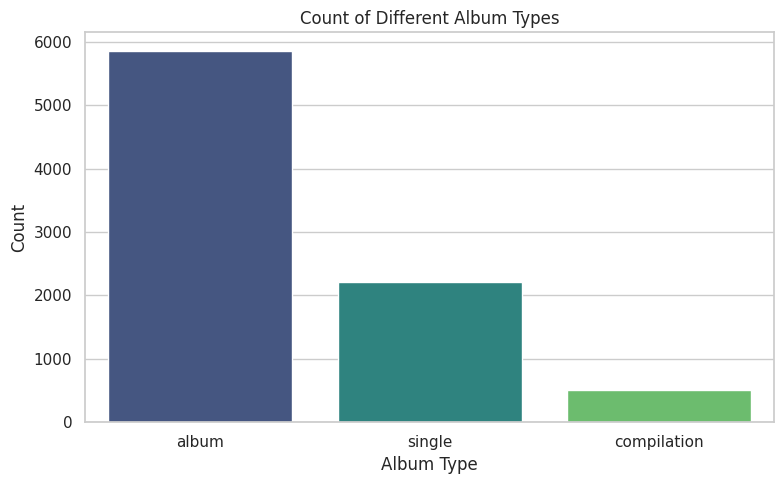

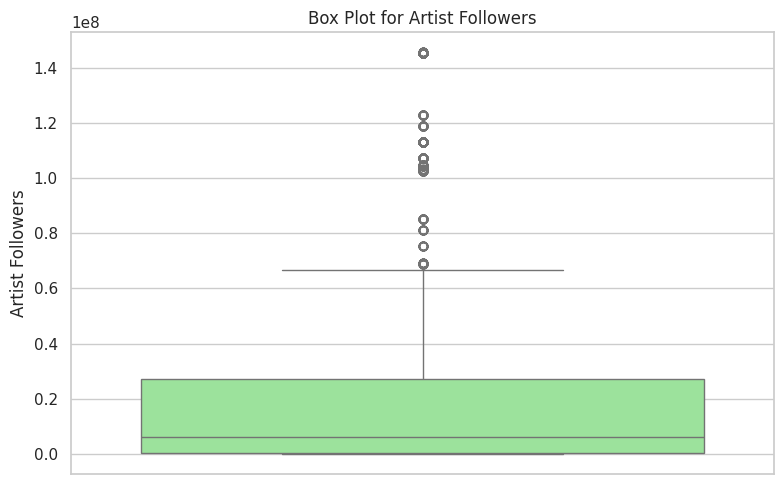

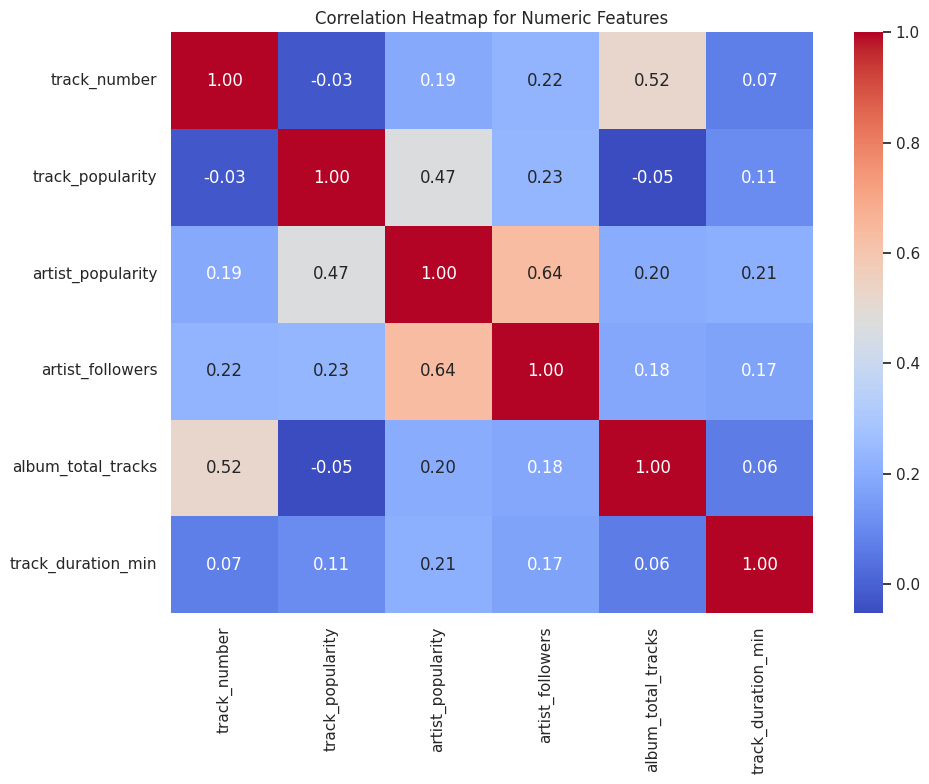

In [8]:
## Exploratory Data Analysis

# Let's create various visualizations to understand the data better.

# 1. Histogram of Track Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['track_popularity'], kde=True, color='skyblue')
plt.title('Histogram of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Count Plot (Pie Chart analogy) for Album Types
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='album_type', palette='viridis')
plt.title('Count of Different Album Types')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Box Plot for Artist Followers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, y='artist_followers', color='lightgreen')
plt.title('Box Plot for Artist Followers')
plt.ylabel('Artist Followers')
plt.tight_layout()
plt.show()

# 4. Heatmap for numeric correlations (only if there are at least 4 numeric columns)
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numeric Features')
    plt.tight_layout()
    plt.show()

# 5. Pair Plot for numeric variables
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df, diag_kind='kde', corner=True)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

# 6. Violin Plot for Track Popularity by Album Type
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_clean, x='album_type', y='track_popularity', palette='Set2')
plt.title('Track Popularity Distribution by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()